In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
%matplotlib inline

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
os.chdir('/home/mike/PycharmProjects/WiFinder/Data/final_csvs')

In [4]:
df = pd.read_csv('ABT.csv')

In [5]:
df.head(20)

,Room_Capacity,Module,Registered_Students,Hour,Date,Room,Occupancy,Avg_Count_60min,Avg_Count_30min,Avg_Adj_Count_60min,Avg_Adj_Count_30min
0,90,Vacant,-1,9,2015-11-03,B002,0.00,4.750000,2.000000,0.052778,0.022222
1,90,COMP30110,45,10,2015-11-03,B002,0.50,29.272727,29.000000,0.325253,0.322222
2,90,COMP30260,18,11,2015-11-03,B002,0.50,28.727273,27.250000,0.319192,0.302778
3,90,COMP40370,27,12,2015-11-03,B002,0.50,14.166667,10.000000,0.157407,0.111111
4,90,Vacant,-1,13,2015-11-03,B002,0.00,14.250000,13.333333,0.158333,0.148148
5,90,COMP30240,42,14,2015-11-03,B002,0.75,46.363636,48.000000,0.515152,0.533333
6,90,COMP30240,42,15,2015-11-03,B002,0.25,40.272727,35.800000,0.447475,0.397778
7,90,COMP40370,27,16,2015-11-03,B002,0.25,36.416667,39.600000,0.404630,0.440000
8,90,COMP30190,29,9,2015-11-04,B002,0.25,13.454545,14.000000,0.149495,0.155556
9,90,COMP40660,53,10,2015-11-04,B002,0.25,14.416667,14.166667,0.160185,0.157407


                
                                        SKLearn Log Reg - 1
                                    
             'Module', 'Registered_Students', 'Hour', 'Occupancy', 'Ave_Hour_Count_Adjusted'
             

In [6]:
all_features = ['Module', 'Registered_Students', 'Hour', 'Occupancy', 'Ave_Hour_Count_Adjusted']

In [7]:
ave_60 = ['Occupancy', 'Avg_Count_60min']
ave_30 = ['Occupancy', 'Avg_Count_30min']

ave_adj_60 = ['Occupancy', 'Avg_Adj_Count_60min']
ave_adj_30 = ['Occupancy', 'Avg_Adj_Count_30min']

In [8]:
room_ave = ['Occupancy', 'Avg_Count_30min', 'Room_Capacity']

In [9]:
module_ave = ['Occupancy', 'Avg_Adj_Count_60min', 'Module']

In [10]:
room_name_ave = ['Occupancy', 'Avg_Adj_Count_60min', 'Room']

In [11]:
hour_name_ave = ['Occupancy', 'Avg_Adj_Count_60min', 'Hour']

In [12]:
av = ['Occupancy', 'Avg_Count_60min']

                        FIRST WAVE

In [13]:
# ave_Adj_Five_Model = df[ave1]

# max_Adj_Five_Model = df[max1]

# ave_Adj_Three_Model = df[ave1]

# max_Adj_Three_Model = df[max1]

# ave_Adj_Bin_Model = df[ave1]

# max_Adj_Bin_Model = df[max1]

                        SECOND WAVE

In [14]:
min_five_60min = df[ave_60]
min_three_60min = df[ave_60]
min_two_60min = df[ave_60]

                        THIRD WAVE

In [15]:
room_ave_five = df[room_ave]
room_ave_three = df[room_ave]
room_ave_two = df[room_ave]


                four wave
                

In [16]:
mod_ave_five = df[module_ave]
mod_ave_three = df[module_ave]
mod_ave_two = df[module_ave]

    
                    FIVE WAVE
        

In [17]:
room_name_ave_five = df[room_name_ave]
room_name_ave_three = df[room_name_ave]
room_name_ave_two = df[room_name_ave]

                    
                        SIX WAVE
                        

In [18]:
hour_ave_five = df[hour_name_ave]
hour_ave_three = df[hour_name_ave]
hour_ave_two = df[hour_name_ave]

                    
                        NU WAVE
                        

In [19]:
ave_60_5 = df[ave_60]
ave_60_3 = df[ave_60]
ave_60_2 = df[ave_60]

In [20]:
ave_30_5 = df[ave_30]
ave_30_3 = df[ave_30]
ave_30_2 = df[ave_30]

In [21]:
ave_adj_60_5 = df[ave_adj_60]
ave_adj_60_3 = df[ave_adj_60]
ave_adj_60_2 = df[ave_adj_60]

In [22]:
ave_adj_30_5 = df[ave_adj_30]
ave_adj_30_3 = df[ave_adj_30]
ave_adj_30_2 = df[ave_adj_30]

In [23]:
occupants = df.groupby('Occupancy')

In [24]:
occupants.count()

,Room_Capacity,Module,Registered_Students,Hour,Date,Room,Avg_Count_60min,Avg_Count_30min,Avg_Adj_Count_60min,Avg_Adj_Count_30min
Occupancy,,,,,,,,,,
0.00,67,67,67,67,67,67,67,67,67,67
0.25,96,96,96,96,96,96,96,96,96,96
0.50,40,40,40,40,40,40,40,40,40,40
0.75,12,12,12,12,12,12,12,12,12,12
1.00,1,1,1,1,1,1,1,1,1,1


In [25]:
occupancy_five = {0.00: 'Empty', 0.25 : 'Low', 0.50 : 'Medium', 0.75: 'High', 1.00 : 'High'}

occupancy_three = {0.00: 'Empty', 0.25 : 'Medium', 0.50 : 'Medium', 0.75: 'High', 1.00 : 'High'}

occupancy_binary = {0.00: 'Empty', 0.25 : 'Occupied', 0.50 : 'Occupied', 0.75: 'Occupied', 1.00 : 'Occupied'}

In [26]:
# ave_Adj_Five_Model['Occupancy'].replace(occupancy_five, inplace=True)

In [27]:
# max_Adj_Five_Model['Occupancy'].replace(occupancy_five, inplace=True)

In [28]:
# ave_Adj_Three_Model['Occupancy'].replace(occupancy_three, inplace=True)

In [29]:
# max_Adj_Three_Model['Occupancy'].replace(occupancy_three, inplace=True)

In [30]:
# ave_Adj_Bin_Model['Occupancy'].replace(occupancy_binary, inplace=True)

In [31]:
# max_Adj_Bin_Model['Occupancy'].replace(occupancy_binary, inplace=True)

In [32]:
# min_five_model['Occupancy'].replace(occupancy_five, inplace=True)

In [33]:
# min_three_model['Occupancy'].replace(occupancy_three, inplace=True)

In [34]:
# min_two_model['Occupancy'].replace(occupancy_binary, inplace=True)

In [35]:
room_ave_five['Occupancy'].replace(occupancy_five, inplace=True)

In [36]:
room_ave_three['Occupancy'].replace(occupancy_three, inplace=True)

In [37]:
room_ave_two['Occupancy'].replace(occupancy_binary, inplace=True)

In [38]:
mod_ave_five['Occupancy'].replace(occupancy_five, inplace=True)

In [39]:
mod_ave_three['Occupancy'].replace(occupancy_three, inplace=True)

In [40]:
mod_ave_two['Occupancy'].replace(occupancy_binary, inplace=True)

In [41]:
room_name_ave_five['Occupancy'].replace(occupancy_five, inplace=True)

In [42]:
room_name_ave_three['Occupancy'].replace(occupancy_three, inplace=True)

In [43]:
room_name_ave_two['Occupancy'].replace(occupancy_binary, inplace=True)

In [44]:
hour_ave_five['Occupancy'].replace(occupancy_five, inplace=True)

In [45]:
hour_ave_three['Occupancy'].replace(occupancy_three, inplace=True)

In [46]:
hour_ave_two['Occupancy'].replace(occupancy_binary, inplace=True)

new shit

In [47]:
ave_60_5['Occupancy'].replace(occupancy_five, inplace=True)

In [48]:
ave_60_3['Occupancy'].replace(occupancy_three, inplace=True)

In [49]:
ave_60_2['Occupancy'].replace(occupancy_binary, inplace=True)

In [50]:
ave_30_5['Occupancy'].replace(occupancy_five, inplace=True)

In [51]:
ave_30_3['Occupancy'].replace(occupancy_three, inplace=True)

In [52]:
ave_30_2['Occupancy'].replace(occupancy_binary, inplace=True)

In [53]:
ave_adj_60_5['Occupancy'].replace(occupancy_five, inplace=True)

In [54]:
ave_adj_60_3['Occupancy'].replace(occupancy_three, inplace=True)

In [55]:
ave_adj_60_2['Occupancy'].replace(occupancy_binary, inplace=True)

In [56]:
ave_adj_30_5['Occupancy'].replace(occupancy_five, inplace=True)

In [57]:
ave_adj_30_3['Occupancy'].replace(occupancy_three, inplace=True)

In [58]:
ave_adj_30_2['Occupancy'].replace(occupancy_binary, inplace=True)

    
                            GRAPHING STUFF
                            

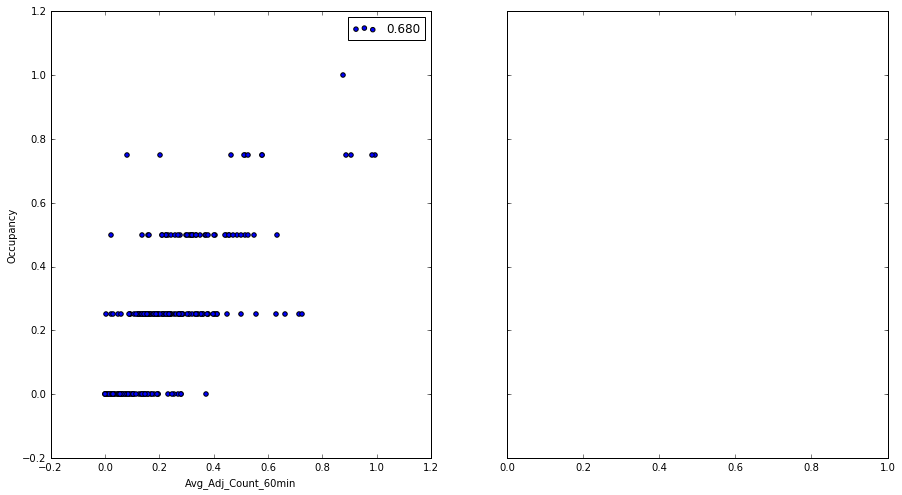

In [59]:
# scatterplots for all continuous features and the target feature total_score
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter',x='Avg_Adj_Count_60min',  y='Occupancy',  label="%.3f" \
        % df[['Avg_Adj_Count_60min','Occupancy' ]].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))

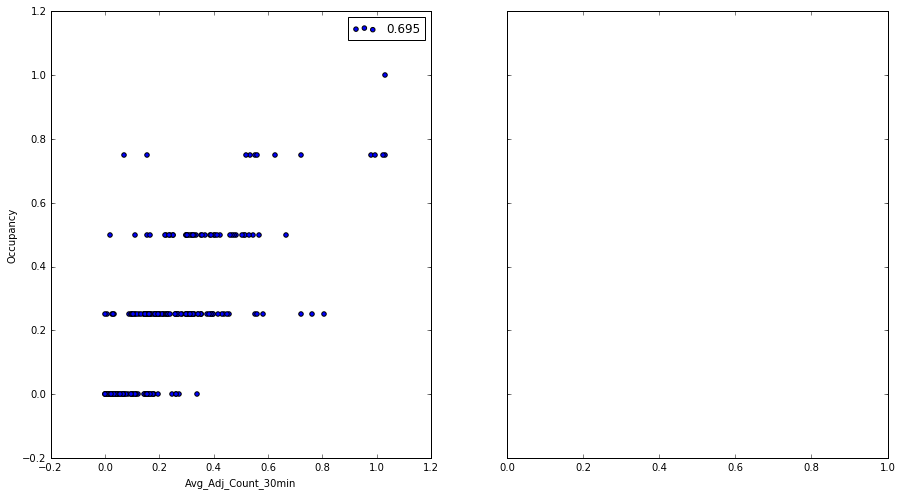

In [60]:
# scatterplots for all continuous features and the target feature total_score
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter',x='Avg_Adj_Count_30min',  y='Occupancy',  label="%.3f" \
        % df[['Avg_Adj_Count_30min','Occupancy' ]].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))

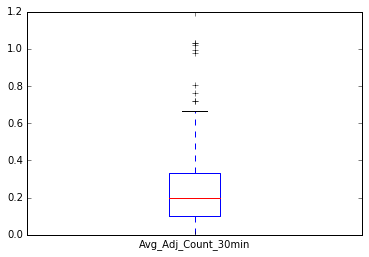

In [61]:
df['Avg_Adj_Count_30min'].plot(kind='box')

In [62]:
df.head(20)

,Room_Capacity,Module,Registered_Students,Hour,Date,Room,Occupancy,Avg_Count_60min,Avg_Count_30min,Avg_Adj_Count_60min,Avg_Adj_Count_30min
0,90,Vacant,-1,9,2015-11-03,B002,0.00,4.750000,2.000000,0.052778,0.022222
1,90,COMP30110,45,10,2015-11-03,B002,0.50,29.272727,29.000000,0.325253,0.322222
2,90,COMP30260,18,11,2015-11-03,B002,0.50,28.727273,27.250000,0.319192,0.302778
3,90,COMP40370,27,12,2015-11-03,B002,0.50,14.166667,10.000000,0.157407,0.111111
4,90,Vacant,-1,13,2015-11-03,B002,0.00,14.250000,13.333333,0.158333,0.148148
5,90,COMP30240,42,14,2015-11-03,B002,0.75,46.363636,48.000000,0.515152,0.533333
6,90,COMP30240,42,15,2015-11-03,B002,0.25,40.272727,35.800000,0.447475,0.397778
7,90,COMP40370,27,16,2015-11-03,B002,0.25,36.416667,39.600000,0.404630,0.440000
8,90,COMP30190,29,9,2015-11-04,B002,0.25,13.454545,14.000000,0.149495,0.155556
9,90,COMP40660,53,10,2015-11-04,B002,0.25,14.416667,14.166667,0.160185,0.157407


                                                                             
                                                                             
                                                                                 SM Log Ave-5

In [63]:
# # 4.1 - Train a logistic regression model to predict the target feature occupancy

# logreg = sm.logit(formula="Occupancy ~ \
#             Ave_Hour_Count_Adjusted", data=df).fit()

In [64]:
# logreg.summary()

    
                                    LINEAR STUFF
                                    

In [65]:
# df.columns

In [66]:
# df['Ave_Count_Squared'] = df['Ave_Hour_Count_Adjusted']

In [67]:
# df.columns.get_loc('Ave_Count_Squared')

In [68]:
# for row in range(df.shape[0]):
#     x = df.iat[row, 10]
#     print(x**2)
#     df.iat[row, 12] = x**2

In [69]:
# df.head(10)

In [70]:
# lm = sm.ols(formula="Occupancy ~ Ave_Hour_Count_Adjusted", data=df).fit()

# print(lm.summary())


                                            SKLearn Log Reg Prep
                                            

In [71]:
df.columns

Index(['Room_Capacity', 'Module', 'Registered_Students', 'Hour', 'Date',
       'Room', 'Occupancy', 'Avg_Count_60min', 'Avg_Count_30min',
       'Avg_Adj_Count_60min', 'Avg_Adj_Count_30min'],
      dtype='object')

In [72]:
# Set your dummies as necessary

date_dummies = pd.get_dummies(df.Date, prefix='Date')
module_dummies = pd.get_dummies(df.Module, prefix='Module')
room_dummies = pd.get_dummies(df.Room, prefix='Room')
hour_dummies = pd.get_dummies(df.Room, prefix='Hour')

In [73]:
# ave_Adj_Five_Model.columns

In [74]:
def SKLogR(df):
    
    intercept = pd.DataFrame({'Intercept': np.ones(216)})
    df = pd.concat([intercept, df], axis=1)
    
    for i in df.columns:
        if i == 'Room':
            df = pd.concat([df, room_dummies], axis=1)
            del df['Room']
            
        if i == 'Date':
            df = pd.concat([df, date_dummies], axis=1)
            del df['Date']
        
        if i == 'Module':
            df = pd.concat([df, module_dummies], axis=1)
            del df['Module']
            
        if i == 'Hour':
            df = pd.concat([df, hour_dummies], axis=1)
            del df['Hour']
            
            
    X = df.ix[:, df.columns != 'Occupancy']
    Y = df.Occupancy
    
    for i in X.columns:
        j = i.split('_')
    
        if j[0] in ['Date', 'Module', 'Room', 'Hour']:
            if i == 'Room_Capacity':
                continue

            X[i] = X[i].astype('category')
        
    logSK = LogisticRegression().fit(X, Y)
    logSK.score(X, Y)
    
    scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=12)
    print(scores.mean())
    
    return logSK


                                        SKLearn Log Reg - 1
                                    
             'Module', 'Registered_Students', 'Hour', 'Occupancy', 'Ave_Hour_Count_Adjusted'
             
                                            ave_5
                                            ave_3
                                            ave_2
                                            max_5
                                            max_3
                                            max_2

In [75]:
# SKLogR(ave_Adj_Five_Model)

In [76]:
# SKLogR(max_Adj_Five_Model)

In [77]:
# SKLogR(ave_Adj_Three_Model)

In [78]:
# SKLogR(max_Adj_Three_Model)

In [79]:
# SKLogR(ave_Adj_Bin_Model)

In [80]:
# SKLogR(max_Adj_Bin_Model)


                                        SKLearn Log Reg - 2
                                    
                                     'Ave_Hour_Count_Adjusted'
             
                                            ave_5
                                            ave_3
                                            ave_2

In [81]:
# SKLogR(min_five_model)

In [82]:
# SKLogR(min_three_model)

In [83]:
# SKLogR(min_two_model)


                                        SKLearn Log Reg - 2
                                    
                                 'Ave_Hour_Count_Adjusted, 'Room'
             
                                            ave_5
                                            ave_3
                                            ave_2
                                            
                                           NOT ROOM

In [84]:
SKLogR(room_ave_five)

0.589482284142


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
SKLogR(room_ave_three)

0.788438825823


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
SKLogR(room_ave_two)

0.825708061002


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


                                        SKLearn Log Reg - 4
                                    
                                 'Ave_Hour_Count_Adjusted, 'Module'
             
                                            ave_5
                                            ave_3
                                            ave_2
                                            
                                         MAYBE MODULE

In [87]:
SKLogR(mod_ave_five)

0.514017887857


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
SKLogR(mod_ave_three)

0.695755933953


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
SKLogR(mod_ave_two)

0.770768833849


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


                                        
                                        SKLearn Log Reg - 5
                                    
                                 'Ave_Hour_Count_Adjusted, 'Room'
             
                                            ave_5
                                            ave_3
                                            ave_2
                                            
                                           NOT ROOM

In [90]:
SKLogR(room_name_ave_five)

0.511231510148


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
SKLogR(room_name_ave_three)

0.67769464511


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
SKLogR(room_name_ave_two)

0.719455911019


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


                                        
                                        SKLearn Log Reg - 6
                                    
                                 'Ave_Hour_Count_Adjusted, 'Hour'
             
                                            ave_5
                                            ave_3
                                            ave_2
                                            
                                           NOT ROOM

In [93]:
SKLogR(hour_ave_five)

0.511231510148


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
SKLogR(hour_ave_three)

0.67769464511


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
SKLogR(hour_ave_two)

0.719455911019


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


                                        
                                        SKLearn Log Reg - 7
                                    
                                           'Ave60'
             
                                              5
                                              3
                                              2

In [96]:
SKLogR(ave_60_5)

0.552549879601


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
SKLogR(ave_60_3)

0.750771127164


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
SKLogR(ave_60_2)

0.820261437908


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


                                        
                                        SKLearn Log Reg - 8
                                    
                                           'Ave30'
             
                                              5
                                              3
                                              2
                                              
                                             BEST

In [99]:
SKLogR(ave_30_5)

0.571584393992


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
SKLogR(ave_30_3)

0.760278351107


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
SKLogR(ave_30_2)

0.810973512212


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


                                        
                                        SKLearn Log Reg - 9
                                    
                                          'Adj_ave_60'
             
                                              5
                                              3
                                              2

In [102]:
SKLogR(ave_adj_60_5)

0.575861426442


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
SKLogR(ave_adj_60_3)

0.635182318541


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
SKLogR(ave_adj_60_2)

0.738820089439


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


                                        
                                        SKLearn Log Reg - 10
                                    
                                          'Adj_ave_30'
             
                                              5
                                              3
                                              2

In [105]:
SKLogR(ave_adj_30_5)

0.59928620571


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
SKLogR(ave_adj_30_3)

0.654790161679


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
SKLogR(ave_adj_30_2)

0.760477582846


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

                                    
                                    how the fuck do i put this in?
                                    

In [108]:
tertiary_logistic_classifier = SKLogR(ave_30_3)

0.760278351107


In [109]:
binary_logistic_classifier = SKLogR(ave_30_2)

0.810973512212


In [110]:
X = pd.DataFrame({'Avg_Count_30min': [75]})

In [111]:
intercept = pd.DataFrame({'Intercept': np.ones(1)})

In [112]:
intercept

,Intercept
0,1


In [113]:
X = pd.concat([intercept, X], axis=1)

In [114]:
X

,Intercept,Avg_Count_30min
0,1,75


In [115]:
predictions = tertiary_logistic_classifier.predict(X[['Intercept', 'Avg_Count_30min']])
print(str(predictions))

['Medium']


In [116]:
def logistic_prep_values(query_result):
    
    X = pd.DataFrame({'Avg_Count_30min': [query_result]})
    intercept = pd.DataFrame({'Intercept': np.ones(1)})
    X = pd.concat([intercept, X], axis=1)
    
    return X

In [117]:
X = logistic_prep_values(75)

In [118]:
def logistic_classifier(query_result, classifier):
    
    X = logistic_prep_values(query_result)
    
    try:
        if classifier == 'binary':
            result = binary_logistic_classifier.predict(X)
        if classifier == 'tertiary':
            result = tertiary_logistic_classifier.predict(X)
    except:
        print('Classifier must be either value "binary" or "tertiary"')
        
    result = str(result)
    
    return result

In [119]:
logistic_classifier(6, 'binary')

"['Empty']"

In [120]:
for i in range(200):
    print('Number: ', i, 'binary: ', logistic_classifier(i, 'binary'), 'tertiary: ', logistic_classifier(i, 'tertiary'))

Number:  0 binary:  ['Empty'] tertiary:  ['Empty']
Number:  1 binary:  ['Empty'] tertiary:  ['Empty']
Number:  2 binary:  ['Empty'] tertiary:  ['Empty']
Number:  3 binary:  ['Empty'] tertiary:  ['Empty']
Number:  4 binary:  ['Empty'] tertiary:  ['Empty']
Number:  5 binary:  ['Empty'] tertiary:  ['Empty']
Number:  6 binary:  ['Empty'] tertiary:  ['Empty']
Number:  7 binary:  ['Empty'] tertiary:  ['Empty']
Number:  8 binary:  ['Empty'] tertiary:  ['Empty']
Number:  9 binary:  ['Empty'] tertiary:  ['Empty']
Number:  10 binary:  ['Empty'] tertiary:  ['Empty']
Number:  11 binary:  ['Empty'] tertiary:  ['Empty']
Number:  12 binary:  ['Empty'] tertiary:  ['Medium']
Number:  13 binary:  ['Occupied'] tertiary:  ['Medium']
Number:  14 binary:  ['Occupied'] tertiary:  ['Medium']
Number:  15 binary:  ['Occupied'] tertiary:  ['Medium']
Number:  16 binary:  ['Occupied'] tertiary:  ['Medium']
Number:  17 binary:  ['Occupied'] tertiary:  ['Medium']
Number:  18 binary:  ['Occupied'] tertiary:  ['Medium

In [121]:
logistic_classifier(1164, 'tertiary')

"['Medium']"

high is only above 1164

In [124]:
binary_logistic_classifier.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>